# Performing Basic Sequence Analysis

Now I am continuing to my bioinformatics cookbook tutorial series. Today's topic is to perform basic sequence analysis which is the basics of Next Generation Sequencing. 

We will do some basic sequence analysis on DNA sequences. FASTA files are our main target on this, also Biopython as a main library of Python.

Let's first download a FASTA sequence

In [1]:
from Bio import Entrez, SeqIO
# Using my email
Entrez.email = "eneskemalergin@gmail.com"
# Get the FASTA file 
hdl = Entrez.efetch(db='nucleotide', id=['NM_002299'],rettype='fasta') # Lactase gene
# Read it and store it in seq
seq = SeqIO.read(hdl, 'fasta')
print "First 10 and last 10: " + seq.seq[:10] + "..." + seq.seq[-10:]

First 10 and last 10: GTTCCTAGAA...CTGTCCTTTC


- Let's save the Biopython object in FASTA file;

In [2]:
from Bio import SeqIO
# Open a new fasta file and make it ready to write on
w_hdl = open('example.fasta', 'w')
# specify the part to write
w_seq = seq[11:5795]
# Write it
SeqIO.write([w_seq], w_hdl, 'fasta')
# And of course close it
w_hdl.close()

> If you want to write many sequences (easily millions with NGS), do not use a list, as shown in the preceding code because this will allocate massive amounts of memory.Either use an iterator or use the ```SeqIO.write``` function several times with a subset of sequence on each write.

- We need to read the sequence of course to be able to use it

In [3]:
# Parse the fasta file and store it in recs
recs = SeqIO.parse('example.fasta', 'fasta')
# Iterate over each records
for rec in recs:
    # Get the sequences of each rec
    seq = rec.seq
    # Show the desription
    print(rec.description)
    # Show the first 10 letter in sequence
    print(seq[:10])
    # 
    print(seq.alphabet)

gi|32481205|ref|NM_002299.2| Homo sapiens lactase (LCT), mRNA
ATGGAGCTGT
SingleLetterAlphabet()


In our example code we have only 1 sequence in 1 FASTA file so we did not have to iterate through each record. Since we won't know each time how many records we will have in FASTA the code above is suitable for most cases.

> The first line of FASTA file is description of the gene, in this case : ```gi|32481205|ref|NM_002299.2| Homo sapiens lactase (LCT), mRNA```

> The second line is the first 10 lettern in sequence

> The last line is shows how the sequence represented

- Now let's change the alphabet of the sequence we got:

> We create a new sequence with a more informative alphabet.

In [4]:
from Bio import Seq
from Bio.Alphabet import IUPAC
seq = Seq.Seq(str(seq), IUPAC.unambiguous_dna)

- Now have an unambiguous DNA, we can transcribe it as follows:

In [5]:
rna = Seq.Seq(str(seq), IUPAC.unambiguous_dna)
rna = seq.transcribe() # Changing DNA into RNA
print "some of the rna variable: "+rna[:10]+"..."+rna[-10:]

some of the rna variable: AUGGAGCUGU...UUCAUUCUGA


> Note that the ```Seq``` constructor takes a string, not a sequence. You will see that the alphabet of the ```rna``` variable is now ```IUPACUnambigousRNA```.

- Finally let's translate it into Protein:

In [6]:
prot = seq.translate() # Changing RNA into corresponding Protein
print "some of the resulting protein sequence: "+prot[:10]+"..."+prot[-10:]

some of the resulting protein sequence: MELSWHVVFI...QELSPVSSF*


Now, we have a protein alphabet with the annotation that there is a stop codon (so, our protein is complete).

---

There are other files to store and represent sequences and we talked about some of them in the [first blog post of the series](http://eneskemalergin.github.io/2015/10/11/Getting_Started_NGS/). Now I will show you how to work with modern file formats such as FASTQ format.

FASTQ files are the standard format output by modern sequencers. The purpose of the following content is to make you comfortable with quality scores and how to work with them. To be able to explain the concept we will use real big data from "1000 Genomes Project"

> Next-generation datasets are generally very large like 1000 Genomes Project. You will need to download some stuff so, get ready to wait :)

Let's Start by downloading the dataset: (BTW the following snippet is for IPython NB so if you are following this from my blog go ahead and [click here](ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz))


In [10]:
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz

--2015-10-26 08:21:31--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
           => 'SRR003265.filt.fastq.gz.1'
Resolving ftp.1000genomes.ebi.ac.uk... 193.62.192.8
Connecting to ftp.1000genomes.ebi.ac.uk|193.62.192.8|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... done.
==> SIZE SRR003265.filt.fastq.gz ... 28919712
==> PASV ... done.    ==> RETR SRR003265.filt.fastq.gz ... done.
Length: 28919712 (28M) (unauthoritative)

SRR003265.filt.fast 100%[=====================>]  27.58M  1.43MB/s   in 15s    

2015-10-26 08:21:49 (1.88 MB/s) - 'SRR003265.filt.fastq.gz.1' saved [28919712]



Now we have file "SRR003265.filt.fastq.gz" which has 3 extensions, 1 is fastq so we are fine. The last one ```gz``` is the thing we will solve with Pyhton Library while we are opening it.

- First we need to open the file:

In [7]:
import gzip # This is the library we need to unzip .gz
from Bio import SeqIO # The usual SeqIO
# Unzip and read the fastq file at the end store it in recs
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz'),'fastq')
rec = next(recs)
# Print the id, description and sequence of the record
print(rec.id, rec.description, rec.seq)
# Print the letter_annotations
# Biopython will convert all the Phred encoding letters to logarithmic scores
print(rec.letter_annotations)

('SRR003265.31', 'SRR003265.31 3042NAAXX:3:1:1252:1819 length=51', Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA', SingleLetterAlphabet()))
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


> You should usually store your FASTQ files in a compressed format, for space saving and processing time saving's sake.

> Don't use list(recs), if you don't want to sacrife a lot of memory, since FASTQ files are usualy big ones.

- Then, let's take a look at the distribution of nucleotide reads:

In [8]:
from collections import defaultdict
# Unzip and read the fastq file
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz'),'fastq')
# Make integer dictionary 
cnt = defaultdict(int)
# Iterate over records
for rec in recs:
    # In each letter of the sequence
    for letter in rec.seq:
        # Count the letters and store the number of count in dictionary cnt
        cnt[letter] += 1
# Find the total of cnt counts
tot = sum(cnt.values())
# Iterate over the dictionary cnt
for letter, cnt_value in cnt.items():
    print('%s: %.2f %d' % (letter, 100. * cnt_value / tot, cnt_value))
    # Prints the following
    # For each Letter inside
    # Print the percentage of apperance in sequences
    # and the total number of letter 
    # Do this for each letter (even for NONE(N))

A: 28.60 7411965
C: 21.00 5444053
T: 29.58 7666885
G: 20.68 5359334
N: 0.14 37289


> Note that there is a residual number for N calls. These are calls in which a sequencer reports an unknown base.

- Now, let's plot the distribution of Ns according to its read position:

(1, 51)

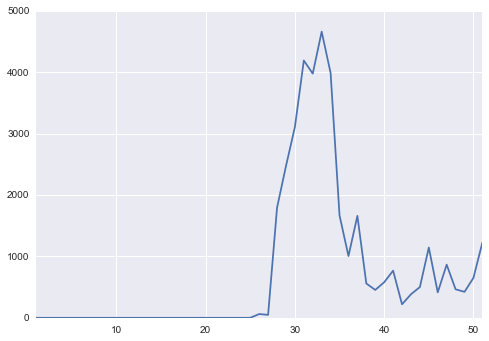

In [9]:
%matplotlib inline 
# Plot it in IPython Directly
# Calling libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Again unzip, read the fastq file 
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz'), 'fastq')
# Make a dictionary
n_cnt = defaultdict(int)
# The same code as before until here 
# iterate through the file and get the position of any references to N.
for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i + 1
        if letter == 'N':
            n_cnt[pos] += 1            
seq_len = max(n_cnt.keys())
positions = range(1, seq_len + 1)
fig, ax = plt.subplots()
ax.plot(positions, [n_cnt[x] for x in positions])
ax.set_xlim(1, seq_len)

> Until position 25, there are no errors. This is not what you will get from a typical sequencer output, because Our example file is already filtered and the 1000 genomes filtering rules enforce that no N calls can occur before position 25.

> the quantity of uncalled bases is positiondependent.

- So, what about the quality of reads?
    - Let's study the distribution of Phred scores and plot the distribution of qualities according to thei read position:

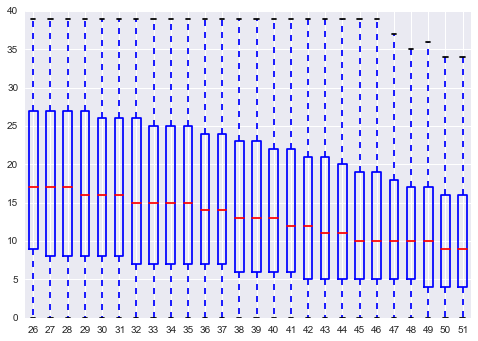

In [12]:
# Reopen and read
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz'),'fastq')
# default dictionary
qual_pos = defaultdict(list)

for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25 or qual == 40:
            continue
        pos = i + 1
        qual_pos[pos].append(qual)
vps = []
poses = qual_pos.keys()
poses.sort()
for pos in poses:
    vps.append(qual_pos[pos])
fig, ax = plt.subplots()
ax.boxplot(vps)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])

> We will ignore both positions sequenced 25 base pairs from start (again, remove this rule if you have unfiltered sequencer data) and the maximum quality score for this file (40). However, in your case, you can consider starting your plotting analysis also with the maximum. You may want to check the maximum possible value for your sequencer hardware. Generally, as most calls can be performed with maximum quality, you may want to remove them if you are trying to understand where quality problems lie.

---